In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import os

In [2]:
# Define Dataset Path
data_dir = r"C:\Users\Anura\Desktop\Innomatics_313\05. Deep Learning\Projects\CNN\Ice-Cream vs Pizza\dataset"

In [3]:
# Define Target Shape
target_shape = (64, 64, 3)

In [4]:
# Initialize CNN Model
cnn_model = Sequential()
cnn_model.add(Input(shape=target_shape))

In [5]:
# Add Convolutional Layers with Dropout and Regularization
cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', kernel_regularizer=l2(0.01)))
cnn_model.add(MaxPool2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', kernel_regularizer=l2(0.01)))
cnn_model.add(MaxPool2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.3))

In [6]:
# Flatten Layer
cnn_model.add(Flatten())

In [7]:
# Fully Connected Layer
cnn_model.add(Dense(units=256, activation='relu', kernel_regularizer=l2(0.01)))
cnn_model.add(Dropout(0.5))

In [8]:
# Output Layer
cnn_model.add(Dense(units=1, activation='sigmoid'))

In [9]:
# Compile the Model
adam = tf.keras.optimizers.Adam(learning_rate=0.0005)
cnn_model.compile(loss="binary_crossentropy", optimizer=adam, metrics=["accuracy"])

In [10]:
# Data Augmentation with More Transformations
train_gen = ImageDataGenerator(
    rescale=1/255.0,
    horizontal_flip=True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2]
)

In [11]:
test_gen = ImageDataGenerator(rescale=1/255.0)

In [12]:
# Load Dataset
train_data = train_gen.flow_from_directory(os.path.join(data_dir, 'train'),
                                           target_size=target_shape[:2],
                                           class_mode='binary',
                                           color_mode = "rgb",
                                           batch_size=64,
                                           shuffle=True)

valid_data = test_gen.flow_from_directory(os.path.join(data_dir, 'valid'),
                                          target_size=target_shape[:2],
                                          class_mode='binary',
                                          color_mode = "rgb",
                                          batch_size=64,
                                          shuffle=False)

test_data = test_gen.flow_from_directory(os.path.join(data_dir, 'test'),
                                         target_size=target_shape[:2],
                                         class_mode='binary',
                                         color_mode = "rgb",
                                         batch_size=64,
                                         shuffle=False)

Found 718 images belonging to 2 classes.
Found 208 images belonging to 2 classes.
Found 106 images belonging to 2 classes.


In [13]:
# Implement Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [14]:
# Train the Model
history = cnn_model.fit(train_data, epochs=20, validation_data=valid_data, callbacks=[early_stop])

C:\Users\Anura\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 415ms/step - accuracy: 0.4920 - loss: 6.0445 - val_accuracy: 0.5481 - val_loss: 4.4152
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 369ms/step - accuracy: 0.6020 - loss: 4.0005 - val_accuracy: 0.7452 - val_loss: 2.9459
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 366ms/step - accuracy: 0.7133 - loss: 2.6874 - val_accuracy: 0.7740 - val_loss: 2.0277
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 367ms/step - accuracy: 0.7657 - loss: 1.9546 - val_accuracy: 0.7740 - val_loss: 1.6121
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 366ms/step - accuracy: 0.7646 - loss: 1.5811 - val_accuracy: 0.8173 - val_loss: 1.3629
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 369ms/step - accuracy: 0.7767 - loss: 1.3199 - val_accuracy: 0.8221 - val_loss: 1.1735
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 372ms/step - accuracy: 0.7820 - loss: 1.1810 - val_accuracy: 0.8317 - val_loss: 1.0256
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 370ms/step - accuracy: 0.7945 - loss: 1.0133 - val_accuracy: 0.

In [15]:
# Evaluate the Model
y_pred = cnn_model.predict(test_data)
y_pred = (y_pred > 0.5).astype("int")

y_test = test_data.classes

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


In [16]:
from sklearn.metrics import accuracy_score, classification_report
print("Test Data Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Test Data Accuracy: 0.839622641509434
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        59
           1       0.84      0.79      0.81        47

    accuracy                           0.84       106
   macro avg       0.84      0.83      0.84       106
weighted avg       0.84      0.84      0.84       106



In [17]:
# Save the Model
cnn_model.save("my_model.keras")

In [18]:
import matplotlib.pyplot as plt

In [19]:
# Extract accuracy and loss values
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

In [20]:
epochs = range(1, len(train_acc) + 1)

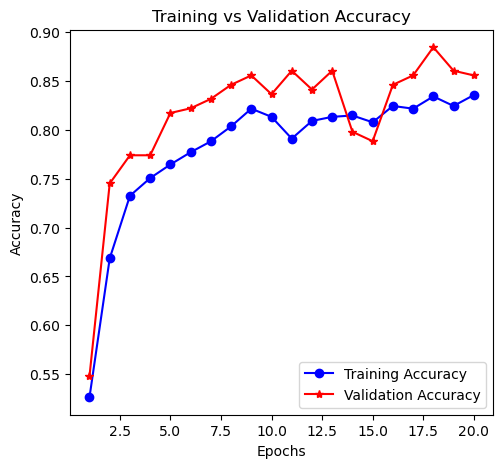

In [21]:
# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r*-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

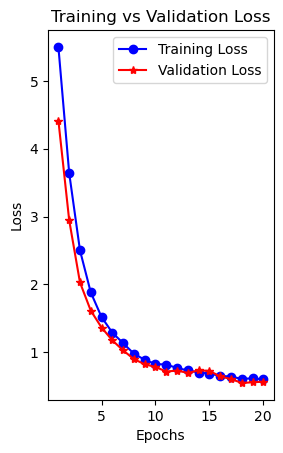

In [22]:
# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()